In [97]:
import pandas as pd
import numpy as np
import csv
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import powerlaw,math
import os
import scipy.stats as stats
import random
from numpy import polyfit, poly1d
import math
import seaborn as sns

In [203]:
Data = {'chemistry':{'Survival':{'StopYear':(-5.136e-02,'***'),'First5YearPubsOfMentee':(7.829e-02,'***'),'BigOrSmall':(-1.059e+00,'***'),
                                'TotalPubsOfMentor':(2.613e-03,'**'),'TotalCitationOfMentor':(5.207e-06,'***'),'TotalCollaOfMentor':(-2.320e-03,'**'),
                                'YearlyPubsOfMentor':(-1.237e-01,'**'),'YearllyCollaOfMentor':(1.214e-01,'**'),'YearlyCitationOfMentor':(0,''),
                                 'CareerAgeOfMentor':(2.332e-02,'***')},
                     'NumOfMenteesOfTheMenteeIn25':{'StopYear':(1.618e-01,'***'),'First5YearPubsOfMentee':(5.098e-02,'***'),'BigOrSmall':(1.762e+00,'***'),
                                'TotalPubsOfMentor':(0,''),'TotalCitationOfMentor':(-1.188e-04,'***'),'TotalCollaOfMentor':(0,''),
                                'YearlyPubsOfMentor':(5.586e-02,'**'),'YearllyCollaOfMentor':(0,''),'YearlyCitationOfMentor':(6.772e-03,'***'),
                                'CareerAgeOfMentor':(1.868e-02,'*')},
                    'Top5':{'StopYear':(1.618e-01,'***'),'First5YearPubsOfMentee':(5.098e-02,'***'),'BigOrSmall':(1.762e+00,'***'),
                                'TotalPubsOfMentor':(0,''),'TotalCitationOfMentor':(-1.188e-04,'***'),'TotalCollaOfMentor':(0,''),
                                'YearlyPubsOfMentor':(5.586e-02,'**'),'YearllyCollaOfMentor':(0,''),'YearlyCitationOfMentor':(6.772e-03,'***'),
                                'CareerAgeOfMentor':(1.868e-02,'*')}},
        
        'physics':{'Survival':{'StopYear':(-4.537e-02,'***'),'First5YearPubsOfMentee':(6.822e-02,'***'),'BigOrSmall':(-1.039e+00,'***'),
                                'TotalPubsOfMentor':(4.403e-03,''),'TotalCitationOfMentor':(6.823e-05,'*'),'TotalCollaOfMentor':(6.234e-03,'**'),
                                'YearlyPubsOfMentor':(-2.621e-01,'*'),'YearllyCollaOfMentor':(0,''),'YearlyCitationOfMentor':(-2.526e-03,''),
                                 'CareerAgeOfMentor':(0,'')},
                   'NumOfMenteesOfTheMenteeIn25':{'StopYear':(8.281e-02,'***'),'First5YearPubsOfMentee':(2.690e-02,'***'),'BigOrSmall':(3.892e-01,'**'),
                                'TotalPubsOfMentor':(-5.930e-03,'**'),'TotalCitationOfMentor':(5.301e-05,''),'TotalCollaOfMentor':(0,''),
                                'YearlyPubsOfMentor':(3.303e-01,'**'),'YearllyCollaOfMentor':(0,''),'YearlyCitationOfMentor':(-2.421e-03,''),
                                 'CareerAgeOfMentor':(0,'')},
                  'Top5':{'StopYear':(1.618e-01,'***'),'First5YearPubsOfMentee':(5.098e-02,'***'),'BigOrSmall':(1.762e+00,'***'),
                                'TotalPubsOfMentor':(0,''),'TotalCitationOfMentor':(-1.188e-04,'***'),'TotalCollaOfMentor':(0,''),
                                'YearlyPubsOfMentor':(5.586e-02,'**'),'YearllyCollaOfMentor':(0,''),'YearlyCitationOfMentor':(6.772e-03,'***'),
                                'CareerAgeOfMentor':(1.868e-02,'*')}},

        'neuro':{'Survival':{'StopYear':(-5.014e-02,'***'),'First5YearPubsOfMentee':(7.743e-02,'***'),'BigOrSmall':(-1.017e+00,'***'),
                                'TotalPubsOfMentor':(2.175e-03,'*'),'TotalCitationOfMentor':(0,''),'TotalCollaOfMentor':(-1.157e-03,''),
                                'YearlyPubsOfMentor':(-0.14725230,'*'),'YearllyCollaOfMentor':(0.115158352,'**'),'YearlyCitationOfMentor':(1.860e-04,'*'),
                                 'CareerAgeOfMentor':(2.253e-02,'***')},
                 'NumOfMenteesOfTheMenteeIn25':{'StopYear':(1.256e-01,'***'),'First5YearPubsOfMentee':(8.538e-02,'***'),'BigOrSmall':(5.724e-01,'*'),
                                'TotalPubsOfMentor':(0.013411780 ,'**'),'TotalCitationOfMentor':(-4.877825e-05,'***'),'TotalCollaOfMentor':(0,''),
                                'YearlyPubsOfMentor':(0,''),'YearllyCollaOfMentor':(0,''),'YearlyCitationOfMentor':(3.012201e-03,'***'),
                                 'CareerAgeOfMentor':(0,'')},
                'Top5':{'StopYear':(1.618e-01,'***'),'First5YearPubsOfMentee':(5.098e-02,'***'),'BigOrSmall':(1.762e+00,'***'),
                                'TotalPubsOfMentor':(0,''),'TotalCitationOfMentor':(-1.188e-04,'***'),'TotalCollaOfMentor':(0,''),
                                'YearlyPubsOfMentor':(5.586e-02,'**'),'YearllyCollaOfMentor':(0,''),'YearlyCitationOfMentor':(6.772e-03,'***'),
                                'CareerAgeOfMentor':(1.868e-02,'*')}}
       }
        
        
        
        
        
#        'math':{'Survival':{'StopYear':(-2.521e-02,'**'),'First5YearPubsOfMentee':(4.125e-02,'***'),'BigOrSmall':(-1.270e+00,'***'),
#                                 'TotalPubsOfMentor':(3.132e-03,''),'TotalCitationOfMentor':(2.272e-05,''),'TotalCollaOfMentor':(2.769e-03,''),
#                                 'YearlyPubsOfMentor':(-2.678e-01,''),'YearllyCollaOfMentor':(-6.901e-02,''),'YearlyCitationOfMentor':(1.374e-03,''),
#                                  'CareerAgeOfMentor':(-8.699e-03,'')},
#                'Success':{'StopYear':(1.840e-01,'**'),'First5YearPubsOfMentee':(2.339e-01,'***'),'BigOrSmall':(-6.228e-01,''),
#                                 'TotalPubsOfMentor':(0,''),'TotalCitationOfMentor':(8.304e-05,'***'),'TotalCollaOfMentor':(-1.242e-02,'***'),
#                                 'YearlyPubsOfMentor':(1.813e-01,'**'),'YearllyCollaOfMentor':(4.465e-01,'**'),'YearlyCitationOfMentor':(-3.786e-03,'**'),
#                                  'CareerAgeOfMentor':(0,'')}}}


In [41]:
-5.136e-02

-0.05136

In [108]:
# Data_chem = Data['chemistry']['Survival']
# x0_ticks = [k for k in Data_chem.keys()]
# x0 = list(range(len(x0_ticks)))
# y0 = np.array([k[0] for k in Data_chem.values()])
# xingxing = [k[1] for k in Data_chem.values()]
# Colors = []
# y1 = []
# xerror = []
# for k in y0:
#     if k>0:
#         Colors.append('dodgerblue')
#         y1.append(math.sqrt(k*10))
#     elif k == 0:
#         Colors.append('white')
#         y1.append(0)
#     else:
#         Colors.append('coral')
#         y1.append(-math.sqrt((-k)*10))
#     xerror.append(0.5)

##### 化学

<ipython-input-223-c17893d9e8da>:114: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])


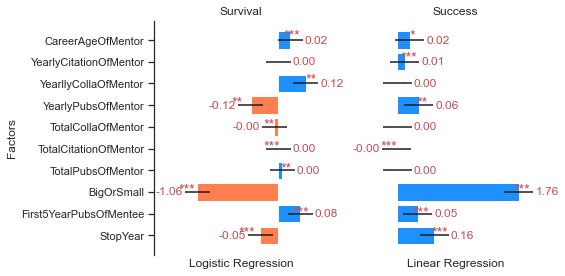

In [223]:
font = {'family': 'DejaVu Sans',
         'weight': 'bold',
         'style':'normal',
         'size': 15,
         }
sns.set(style='ticks', font_scale=1, font='Arial')
fig = plt.figure(figsize=(8,4))
#第一个子图
ax = fig.add_subplot(1,2,1)
Data_chem = Data['chemistry']['Survival']
x0_ticks = [k for k in Data_chem.keys()]
x0 = list(range(len(x0_ticks)))
y0 = np.array([k[0] for k in Data_chem.values()])

xingxing = [k[1] for k in Data_chem.values()]
HGT_xx = np.array(range(len(x0_ticks)))*1.02
HGT_xx[0] = 0.1;HGT_xx[1] = 1.05

Colors = []
y1 = []
xerror = []
for k in y0:
    if k>0:
        Colors.append('dodgerblue')
        y1.append(math.sqrt(k*10))
    elif k == 0:
        Colors.append('white')
        y1.append(0)
    else:
        Colors.append('coral')
        y1.append(-math.sqrt((-k)*10))
    xerror.append(0.5)
hbars = ax.barh(x0_ticks, y1,color=Colors,xerr=xerror,align='center')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')
ax.bar_label(hbars, labels=['%.2f' % e for e in y0],
             padding=2, color='r', fontsize=12)
# ax.set(xlim=[0, 0.6], xlabel='Total Revenue', ylabel='Company',
#        title='Company Revenue')
ax.set_ylabel('Factors')
ax.set_xlabel('Logistic Regression')
ax.set_title('Survival')
ax.set_xlim([-5,2])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])

manually = [2,3,9]
for ii in range(len(x0_ticks)):
    if ii not in manually:
        ax.text(y1[ii]*1.35, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 2
ax.text(y1[ii]*1.05, HGT_xx[ii]*1.03, xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签        

ii = 3
ax.text(y1[ii]*3, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签


ii = 9
ax.text(y1[ii]*1.7, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签



#第二张子图
ax = fig.add_subplot(1,2,2)
Data_chem = Data['chemistry']['Success']
x0_ticks = [k for k in Data_chem.keys()]
x0 = list(range(len(x0_ticks)))
y0 = np.array([k[0] for k in Data_chem.values()])

xingxing = [k[1] for k in Data_chem.values()]
HGT_xx = np.array(range(len(x0_ticks)))*1.02
HGT_xx[0] = 0.1;HGT_xx[1] = 1.05

Colors = []
y1 = []
xerror = []
for k in y0:
    if k>0:
        Colors.append('dodgerblue')
        y1.append(math.sqrt(k*10))
    elif k == 0:
        Colors.append('white')
        y1.append(0)
    else:
        Colors.append('coral')
        y1.append(-math.sqrt((-k)*10))
    xerror.append(0.5)
hbars = ax.barh(x0_ticks, y1,color=Colors,xerr=xerror,align='center')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')
ax.bar_label(hbars, labels=['%.2f' % e for e in y0],
             padding=2, color='r', fontsize=12)
# ax.set(xlim=[0, 0.6], xlabel='Total Revenue', ylabel='Company',
#        title='Company Revenue')
# ax.set_ylabel('Factors')
ax.set_xlabel('Linear Regression')
ax.set_title('Success')
ax.set_xlim([-1,5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

manually = [1,2,8]
for ii in range(len(x0_ticks)):
    if ii not in manually:
        ax.text(y1[ii]*1.35, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 1
ax.text(y1[ii]*1.5, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 2
ax.text(y1[ii]*1.08, HGT_xx[ii]*1.03, xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签

ii = 8
ax.text(y1[ii]*2.5, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
        
# ax.set_yticks(x0_ticks)
fig.tight_layout()
fig.savefig('regression_chemistry.pdf')
# ax.xaxis.set_major_formatter(currency)

##### 物理

<ipython-input-222-54c8e75aa847>:123: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])


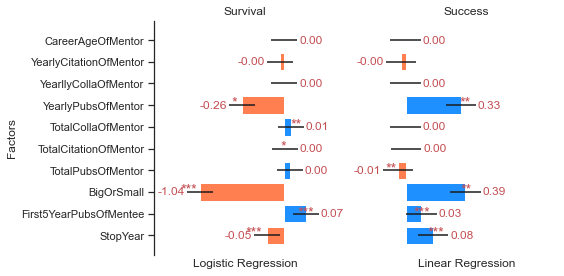

In [222]:
font = {'family': 'DejaVu Sans',
         'weight': 'bold',
         'style':'normal',
         'size': 15,
         }
sns.set(style='ticks', font_scale=1, font='Arial')
fig = plt.figure(figsize=(8,4))
#第一个子图
ax = fig.add_subplot(1,2,1)
Data_chem = Data['physics']['Survival']
x0_ticks = [k for k in Data_chem.keys()]
x0 = list(range(len(x0_ticks)))
y0 = np.array([k[0] for k in Data_chem.values()])

xingxing = [k[1] for k in Data_chem.values()]
HGT_xx = np.array(range(len(x0_ticks)))*1.02
HGT_xx[0] = 0.1;HGT_xx[1] = 1.05

Colors = []
y1 = []
xerror = []
for k in y0:
    if k>0:
        Colors.append('dodgerblue')
        y1.append(math.sqrt(k*10))
    elif k == 0:
        Colors.append('white')
        y1.append(0)
    else:
        Colors.append('coral')
        y1.append(-math.sqrt((-k)*10))
    xerror.append(0.5)
hbars = ax.barh(x0_ticks, y1,color=Colors,xerr=xerror,align='center')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')
ax.bar_label(hbars, labels=['%.2f' % e for e in y0],
             padding=2, color='r', fontsize=12)
# ax.set(xlim=[0, 0.6], xlabel='Total Revenue', ylabel='Company',
#        title='Company Revenue')
ax.set_ylabel('Factors')
ax.set_xlabel('Logistic Regression')
ax.set_title('Survival')
ax.set_xlim([-5,2])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])

manually = [2,3,9,5,6]
for ii in range(len(x0_ticks)):
    if ii not in manually:
        ax.text(y1[ii]*1.35, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 2
ax.text(y1[ii]*1.05, HGT_xx[ii]*1.03, xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签        

ii = 3
ax.text(y1[ii]*3, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 5
ax.text(y1[ii]*2.5, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签

ii = 6
ax.text(y1[ii]*1.15, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签


ii = 9
ax.text(y1[ii]*1.7, HGT_xx[ii], xingxing[ii], 
                fontsize=16, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签



#第二张子图
ax = fig.add_subplot(1,2,2)
Data_chem = Data['physics']['Success']
x0_ticks = [k for k in Data_chem.keys()]
x0 = list(range(len(x0_ticks)))
y0 = np.array([k[0] for k in Data_chem.values()])

xingxing = [k[1] for k in Data_chem.values()]
HGT_xx = np.array(range(len(x0_ticks)))*1.02
HGT_xx[0] = 0.1;HGT_xx[1] = 1.05

Colors = []
y1 = []
xerror = []
for k in y0:
    if k>0:
        Colors.append('dodgerblue')
        y1.append(math.sqrt(k*10))
    elif k == 0:
        Colors.append('white')
        y1.append(0)
    else:
        Colors.append('coral')
        y1.append(-math.sqrt((-k)*10))
    xerror.append(0.5)
hbars = ax.barh(x0_ticks, y1,color=Colors,xerr=xerror,align='center')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')
ax.bar_label(hbars, labels=['%.2f' % e for e in y0],
             padding=2, color='r', fontsize=12)
# ax.set(xlim=[0, 0.6], xlabel='Total Revenue', ylabel='Company',
#        title='Company Revenue')
# ax.set_ylabel('Factors')
ax.set_xlabel('Linear Regression')
ax.set_title('Success')
ax.set_xlim([-1,5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

manually = [1,2,8,6]
for ii in range(len(x0_ticks)):
    if ii not in manually:
        ax.text(y1[ii]*1.35, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 1
ax.text(y1[ii]*1.5, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 2
ax.text(y1[ii]*1.08, HGT_xx[ii]*1.03, xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 6
ax.text(y1[ii]*1.15, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签

ii = 8
ax.text(y1[ii]*2.5, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
        
# ax.set_yticks(x0_ticks)
fig.tight_layout()
fig.savefig('regression_physics.pdf')
# ax.xaxis.set_major_formatter(currency)

##### Neuro

<ipython-input-221-581e440a45f6>:114: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])


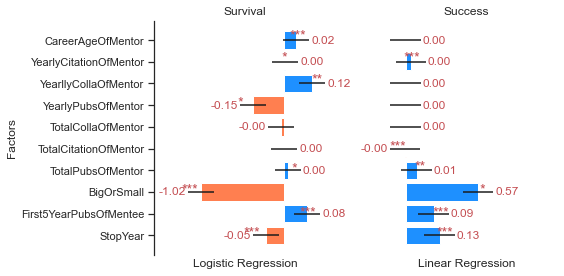

In [221]:
font = {'family': 'DejaVu Sans',
         'weight': 'bold',
         'style':'normal',
         'size': 15,
         }
sns.set(style='ticks', font_scale=1, font='Arial')
fig = plt.figure(figsize=(8,4))
#第一个子图
ax = fig.add_subplot(1,2,1)
Data_chem = Data['neuro']['Survival']
x0_ticks = [k for k in Data_chem.keys()]
x0 = list(range(len(x0_ticks)))
y0 = np.array([k[0] for k in Data_chem.values()])

xingxing = [k[1] for k in Data_chem.values()]
HGT_xx = np.array(range(len(x0_ticks)))*1.02
HGT_xx[0] = 0.1;HGT_xx[1] = 1.05

Colors = []
y1 = []
xerror = []
for k in y0:
    if k>0:
        Colors.append('dodgerblue')
        y1.append(math.sqrt(k*10))
    elif k == 0:
        Colors.append('white')
        y1.append(0)
    else:
        Colors.append('coral')
        y1.append(-math.sqrt((-k)*10))
    xerror.append(0.5)
hbars = ax.barh(x0_ticks, y1,color=Colors,xerr=xerror,align='center')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')
ax.bar_label(hbars, labels=['%.2f' % e for e in y0],
             padding=2, color='r', fontsize=12)
# ax.set(xlim=[0, 0.6], xlabel='Total Revenue', ylabel='Company',
#        title='Company Revenue')
ax.set_ylabel('Factors')
ax.set_xlabel('Logistic Regression')
ax.set_title('Survival')
ax.set_xlim([-5,2])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])

manually = [2,3,9]
for ii in range(len(x0_ticks)):
    if ii not in manually:
        ax.text(y1[ii]*1.35, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 2
ax.text(y1[ii]*1.05, HGT_xx[ii]*1.03, xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签        

ii = 3
ax.text(y1[ii]*3, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签


ii = 9
ax.text(y1[ii]*1.7, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签



#第二张子图
ax = fig.add_subplot(1,2,2)
Data_chem = Data['neuro']['Success']
x0_ticks = [k for k in Data_chem.keys()]
x0 = list(range(len(x0_ticks)))
y0 = np.array([k[0] for k in Data_chem.values()])

xingxing = [k[1] for k in Data_chem.values()]
HGT_xx = np.array(range(len(x0_ticks)))*1.02
HGT_xx[0] = 0.1;HGT_xx[1] = 1.05

Colors = []
y1 = []
xerror = []
for k in y0:
    if k>0:
        Colors.append('dodgerblue')
        y1.append(math.sqrt(k*10))
    elif k == 0:
        Colors.append('white')
        y1.append(0)
    else:
        Colors.append('coral')
        y1.append(-math.sqrt((-k)*10))
    xerror.append(0.5)
hbars = ax.barh(x0_ticks, y1,color=Colors,xerr=xerror,align='center')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')
ax.bar_label(hbars, labels=['%.2f' % e for e in y0],
             padding=2, color='r', fontsize=12)
# ax.set(xlim=[0, 0.6], xlabel='Total Revenue', ylabel='Company',
#        title='Company Revenue')
# ax.set_ylabel('Factors')
ax.set_xlabel('Linear Regression')
ax.set_title('Success')
ax.set_xlim([-1,5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

manually = [1,2,8,3]
for ii in range(len(x0_ticks)):
    if ii not in manually:
        ax.text(y1[ii]*1.35, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 1
ax.text(y1[ii]*1.5, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 2
ax.text(y1[ii]*1.08, HGT_xx[ii]*1.03, xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 3
ax.text(y1[ii]*1.7, HGT_xx[ii]*1.03, xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签

ii = 8
ax.text(y1[ii]*2.5, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
        
# ax.set_yticks(x0_ticks)
fig.tight_layout()
fig.savefig('regression_neuro.pdf')
# ax.xaxis.set_major_formatter(currency)

<ipython-input-220-c0d76b0ddf4c>:122: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])


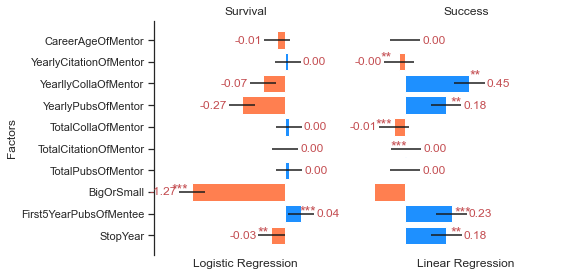

In [220]:
font = {'family': 'DejaVu Sans',
         'weight': 'bold',
         'style':'normal',
         'size': 15,
         }
sns.set(style='ticks', font_scale=1, font='Arial')
fig = plt.figure(figsize=(8,4))
#第一个子图
ax = fig.add_subplot(1,2,1)
Data_chem = Data['math']['Survival']
x0_ticks = [k for k in Data_chem.keys()]
x0 = list(range(len(x0_ticks)))
y0 = np.array([k[0] for k in Data_chem.values()])

xingxing = [k[1] for k in Data_chem.values()]
HGT_xx = np.array(range(len(x0_ticks)))*1.02
HGT_xx[0] = 0.1;HGT_xx[1] = 1.05

Colors = []
y1 = []
xerror = []
for k in y0:
    if k>0:
        Colors.append('dodgerblue')
        y1.append(math.sqrt(k*10))
    elif k == 0:
        Colors.append('white')
        y1.append(0)
    else:
        Colors.append('coral')
        y1.append(-math.sqrt((-k)*10))
    xerror.append(0.5)
hbars = ax.barh(x0_ticks, y1,color=Colors,xerr=xerror,align='center')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')
ax.bar_label(hbars, labels=['%.2f' % e for e in y0],
             padding=2, color='r', fontsize=12)
# ax.set(xlim=[0, 0.6], xlabel='Total Revenue', ylabel='Company',
#        title='Company Revenue')
ax.set_ylabel('Factors')
ax.set_xlabel('Logistic Regression')
ax.set_title('Survival')
ax.set_xlim([-5,2])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])

manually = [1,2,3,9]
for ii in range(len(x0_ticks)):
    if ii not in manually:
        ax.text(y1[ii]*1.35, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签

         

ii = 1
ax.text(y1[ii]*1.8, HGT_xx[ii]*1.03, xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签  
        
ii = 2
ax.text(y1[ii]*1.05, HGT_xx[ii]*1.03, xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签        

ii = 3
ax.text(y1[ii]*3, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签


ii = 9
ax.text(y1[ii]*1.7, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签



#第二张子图
ax = fig.add_subplot(1,2,2)
Data_chem = Data['math']['Success']
x0_ticks = [k for k in Data_chem.keys()]
x0 = list(range(len(x0_ticks)))
y0 = np.array([k[0] for k in Data_chem.values()])

xingxing = [k[1] for k in Data_chem.values()]
HGT_xx = np.array(range(len(x0_ticks)))*1.02
HGT_xx[0] = 0.1;HGT_xx[1] = 1.05

Colors = []
y1 = []
xerror = []
for k in y0:
    if k>0:
        Colors.append('dodgerblue')
        y1.append(math.sqrt(k*10))
    elif k == 0:
        Colors.append('white')
        y1.append(0)
    else:
        Colors.append('coral')
        y1.append(-math.sqrt((-k)*10))
    xerror.append(0.5)
hbars = ax.barh(x0_ticks, y1,color=Colors,xerr=xerror,align='center')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')
ax.bar_label(hbars, labels=['%.2f' % e for e in y0],
             padding=2, color='r', fontsize=12)
# ax.set(xlim=[0, 0.6], xlabel='Total Revenue', ylabel='Company',
#        title='Company Revenue')
# ax.set_ylabel('Factors')
ax.set_xlabel('Linear Regression')
ax.set_title('Success')
ax.set_xlim([-1,5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

manually = [1,2,8,3,7]
for ii in range(len(x0_ticks)):
    if ii not in manually:
        ax.text(y1[ii]*1.35, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 1
ax.text(y1[ii]*1.4, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 2
ax.text(y1[ii]*1.08, HGT_xx[ii]*1.03, xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
ii = 3
ax.text(y1[ii]*1.7, HGT_xx[ii]*1.03, xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签

ii = 7
ax.text(y1[ii]*1.15, HGT_xx[ii]*1.03, xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签

ii = 8
ax.text(y1[ii]*2.5, HGT_xx[ii], xingxing[ii], 
                fontsize=14, color = "r", style = "italic", weight = "light",
                verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签
        
# ax.set_yticks(x0_ticks)
fig.tight_layout()
fig.savefig('regression_math.pdf')
# ax.xaxis.set_major_formatter(currency)